# **Problem Statement 9:Question No.2. IMDB-50K Movie Review dataset**

## **1. Import Libraries/Dataset**





In [92]:
%tensorflow_version 2.x
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
#wordclouds and cloud stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
# please download the data and put in goggle drive under Colab Notebooks folder first
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [47]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

## **2. Data Visualization**

**A. Print at least two movie reviews from each class of the dataset, for a sanity check that labels match the text.**

In [48]:
print(df[df.sentiment=='positive']['review'].values[:2])

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [49]:
print(df[df.sentiment=='negative']['review'].values[:2])

["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."
 "This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to

**B. Plot a bar graph of class distribution in dataset. Each bar depicts the number of tweets belonging to a particular sentiment.**

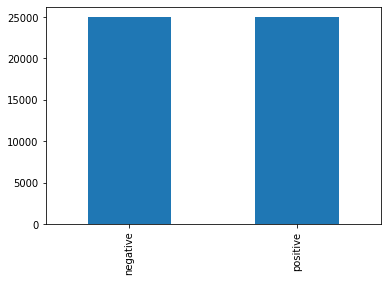

In [50]:
df.sentiment.value_counts().plot(kind='bar')

**C. Other visualizations**

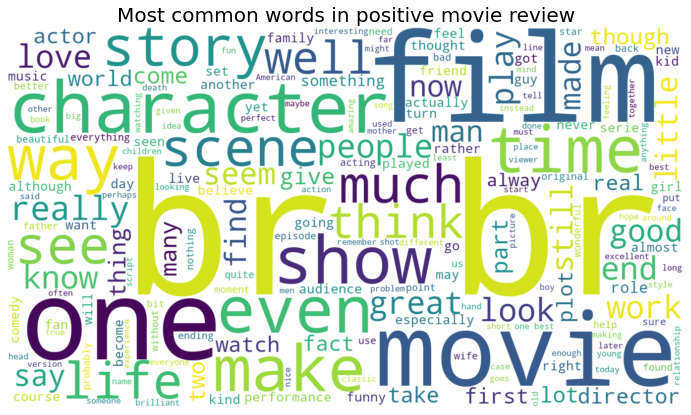

In [56]:
#Plot the word frequency from positive movie reviews
plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(df[df.sentiment=='positive'].review))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in positive movie review',fontsize=20)
plt.show()

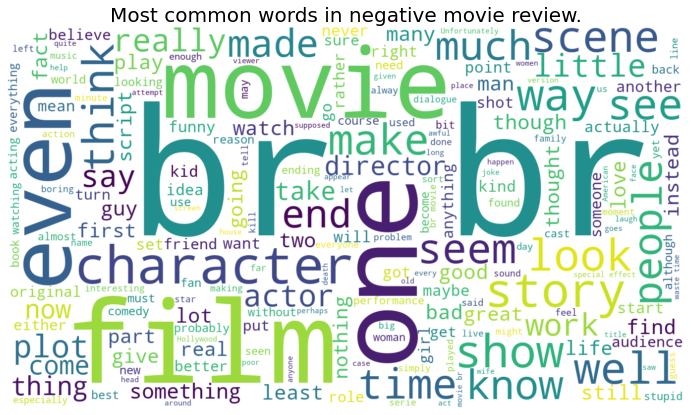

In [55]:
#Plot the word frequency from Negative review
plt.figure(figsize=(14,7))
word_cloud = WordCloud(stopwords = STOPWORDS, max_words = 200, width=1366, height=768, background_color="white").generate(" ".join(df[df.sentiment=='negative'].review))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words in negative movie review.',fontsize=20)
plt.show()

**D. Print the shapes of train and test data.**



In [57]:
X, Y = df.review, df.sentiment
X.shape, Y.shape

((50000,), (50000,))

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,)
X_train.shape, X_test.shape

((37500,), (12500,))

In [59]:
print(Y_train.value_counts()) 
print(Y_test.value_counts())

positive    18787
negative    18713
Name: sentiment, dtype: int64
negative    6287
positive    6213
Name: sentiment, dtype: int64


## **3. Data Pre-processing**

1. Text Pre-Processing

In [60]:
#HTML Parsing to Text
def process_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
  
#Removing the square brackets
def remove_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing special characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,' ',text)
    text = text.strip()
    return text

# Text Lemmatization
lemmatizer = WordNetLemmatizer()
def simple_lemma(text):
    text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

#removing the stopwords
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text    

def pre_process_text(text):
    text = process_html(text)
    text = remove_brackets(text)
    text = remove_stopwords(text)
    text = remove_special_characters(text)
    text = simple_lemma(text)
    
    return text

In [61]:
%%time
X_train = X_train.apply(pre_process_text)
X_test = X_test.apply(pre_process_text)

CPU times: user 1min 21s, sys: 189 ms, total: 1min 21s
Wall time: 1min 21s


In [62]:
Y_train = Y_train.map({'positive': 1, 'negative':0})
Y_test = Y_test.map({'positive': 1, 'negative':0})


 2. Using Pre-trained layer and bring test and train data in required format

In [63]:

model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
# X_train = hub_layer(X_train)
# X_test = hub_layer(X_test)

# **4. Model Building**

1.   Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
2.   Add L2 regularization to all the layers.

1.   Add one layer of dropout at the appropriate position and give reasons.

2.   Choose the appropriate activation function for all the layers.

1.   Print the model summary.




In [64]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(), name="Input", dtype=tf.string))
model.add(hub_layer)
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1632      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 48,192,777
Trainable params: 48,192,777
Non-trainable params: 0
_________________________________________________________________


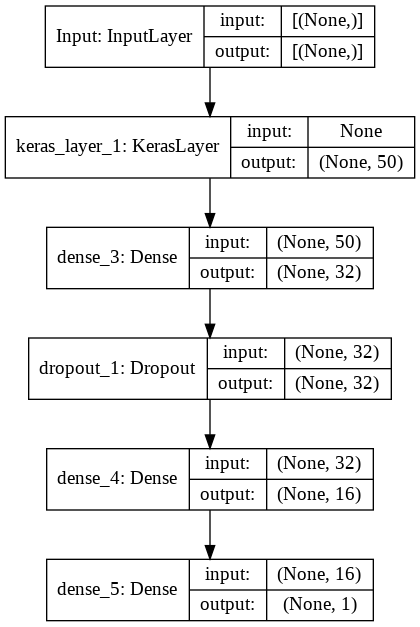

In [65]:
#print the model
tf.keras.utils.plot_model(model, show_shapes=True)

**Reason for choosing Hidden units:**

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

1. The number of hidden neurons should be between the size of the input layer and the size of the output layer.<br>
2. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.</b>italicized text
3. The number of hidden neurons should be less than twice the size of the input layer.

Using these 3 formulas.<br> 
Getting values ~ 32 and 16 for the 2 hidden layers.

**Reason for putting dropout just after the pre-trained vector.**

Usually, dropout is placed on the fully connected layers only because they are the one with the greater number of parameters and thus they're likely to excessively co-adapting themselves causing overfitting

**Choice of Activation functions:**

We have used relu, in all the hidden layers because rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.

In the output layer, we want binary output (0 or 1) so we have used sigmoid.

# **5. Model Compilation**

In [66]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']) 

We are choosing Adam Optimizer.

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the 'exponentially weighted average' of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace

Adam is and adaptive optimizer, and it learns the learning rates itself, on a per-parameter basis. So we are not specifying learning rate

# **6. Model Training**

Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.

Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

In [68]:
# Creating validation set

X_validation_ = X_train[:5000]
X_train_ = X_train[5000:]

Y_validation_ = Y_train[:5000]
Y_train_ = Y_train[5000:]


X_train_.shape, X_validation_.shape, Y_train_.shape, Y_validation_.shape

((32500,), (5000,), (32500,), (5000,))

In [69]:
import time

start_time = time.time()

history = model.fit(X_train_,
                    Y_train_,
                    epochs=25,
                    batch_size=256,
                    validation_data=(X_validation_, Y_validation_),
                    verbose=1)
print("Time taken to train the model in seconds: " + str(time.time() - start_time))

Epoch 1/25
127/127 [==============================] - 64s 498ms/step - loss: 5.2249 - accuracy: 0.5568 - val_loss: 2.2010 - val_accuracy: 0.7866
Epoch 2/25
127/127 [==============================] - 63s 495ms/step - loss: 1.7868 - accuracy: 0.7294 - val_loss: 1.0284 - val_accuracy: 0.8270
Epoch 3/25
127/127 [==============================] - 63s 495ms/step - loss: 0.9328 - accuracy: 0.7948 - val_loss: 0.7709 - val_accuracy: 0.8452
Epoch 4/25
127/127 [==============================] - 63s 496ms/step - loss: 0.7497 - accuracy: 0.8188 - val_loss: 0.7170 - val_accuracy: 0.8454
Epoch 5/25
127/127 [==============================] - 63s 497ms/step - loss: 0.7065 - accuracy: 0.8352 - val_loss: 0.6764 - val_accuracy: 0.8618
Epoch 6/25
127/127 [==============================] - 63s 496ms/step - loss: 0.6523 - accuracy: 0.8612 - val_loss: 0.6088 - val_accuracy: 0.8790
Epoch 7/25
127/127 [==============================] - 63s 495ms/step - loss: 0.5883 - accuracy: 0.8861 - val_loss: 0.5743 - val_ac

Used the formula to find the ~ batch size to be used.

batch size= available GPU memory bytes / (size of tensors + trainable parameters)

Considering GPU memory = 12GB = 12*1024*1024*1024

trainable parameters = 48,192,777

So, batch size ~ 270, so choosed 256.

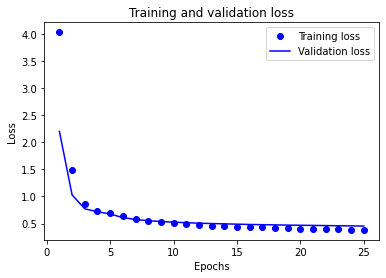

In [70]:
# Plot the loss and accuracy history graphs for both train and validation set.

history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

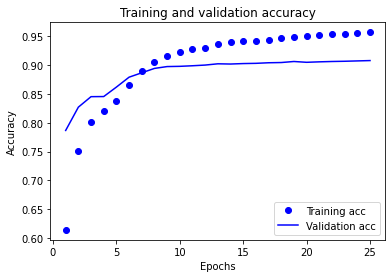

In [71]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **7. Model Evaluation**

a. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

b. Print the two most incorrectly classified texts for each class in the test dataset.

In [74]:
results = model.evaluate(X_test, Y_test)
print("Loss and acuracy for test set :")
print(results)

391/391 [==============================] - 1s 3ms/step - loss: 0.4559 - accuracy: 0.9030
Loss and acuracy for test set :
[0.4559076428413391, 0.9029600024223328]


In [75]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred_prob = model.predict(X_test)
confusion = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)
confusion

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5619,  668],
       [ 545, 5668]], dtype=int32)>



Confusion Matrix


[[5619  668]
 [ 545 5668]]




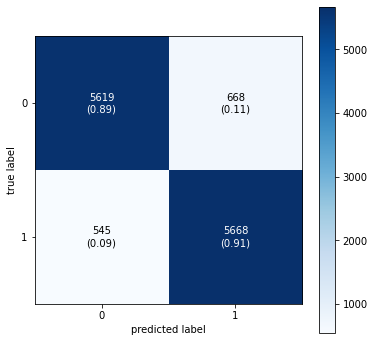

In [94]:
#Confusion matrix
print('\n')
print("Confusion Matrix")
print('\n')
CR=confusion_matrix(Y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(6, 6),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [76]:
from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()
test_predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(Y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6287
           1       0.89      0.91      0.90      6213

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

Time taken to predict the model 0.9244012832641602


In [78]:
# Compute most errorenous predictions
res = []
for i,j,k  in zip(X_test, Y_test, y_pred_prob):
    res.append([i, j-k])

def takeSecond(elem):
    return elem[1]
res.sort(key=takeSecond)

In [79]:
# Most errorenous positive predictions
res[:2]

[['one best celebrity reality show ever saw see concert see life Britney love five episode always surprised Britney subject show think people watch show great person his really funny really gentle love fan see love work give 10 k fed real jerk seem like Britney all make second season great show show people Britney really is Go Britney best never leave heart',
  array([-0.970919], dtype=float32)],
 ['Mickey Rourke hunt Diane Lane Elmore Leonard Killshot like Mickey Rourke ever really disappeared steady string appearance burst back scene memorable Domino Sin City Man Fire Upon Time Mexico Get Carter powerful dramatic performance Wrestler 2008 see full blown presentation character hinted Get Carter Whenever get know Rourke remains cool sleazy muscle bound slim ball This Elmore Leonard story production Leonard wrote notable movie taunt western thriller 3 10 Yuma Cool Jackie Brown Get Shorty 52 Pick Up Joe Kidd mean get tough guy good good It also mean get tight realistic plot character bes

In [80]:
# Most errorenous negative predictions
res[-2:]

[['bunch American student tutor decide visit ugliest part Ireland order study ancient religious practice Despite repeatedly warned danger straying beaten path local creepy Irish guy natch wind inside outside courtesy family inbred cannibal descendant infamous Sawney Bean clan according film silly plot upped stick Scotland settled Emerald Isle If think porn star plus low budget horror automatically equal ton nudity terrible acting think Evil Breed bristling adult star fact nearly much nudity one might expect given talent involved acting although far Oscar worthy bad exception Ginger Lynn Allen know marvellous French whose Irish lousy Evil Breed open superb style brutal slaughter couple amorous camper brief under canvas sex silicone enhanced hottie dragged tent torn half guy arm leg cut roasted spit gory start bodes well rest film Unfortunately promising beginning thing start go seriously downhill introduced main character annoying bunch twenty somethings begging become cannibal chow sub

# **Modified Model 1 - Tuning Network Depth: Change the number of hidden layers and hidden units for each layer**


In [81]:
import gc
tf.keras.backend.clear_session()
gc.collect()

53

In [82]:
# Dropout: Change the position and value of dropout layer, changed hidden nodes of each layer

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Input(shape=(), name="Input", dtype=tf.string))
model1.add(hub_layer)
model1.add(tf.keras.layers.Dropout(0.30))
model1.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model1.add(tf.keras.layers.Dropout(0.30))
model1.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model1.add(tf.keras.layers.Dropout(0.20))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))



model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

In [83]:
model1.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])  

In [84]:
history = model1.fit(X_train_,
                    Y_train_,
                    epochs=25,
                    batch_size=256,
                    validation_data=(X_validation_, Y_validation_),
                    verbose=1)

Epoch 1/25
127/127 [==============================] - 64s 498ms/step - loss: 8.0109 - accuracy: 0.7944 - val_loss: 2.4115 - val_accuracy: 0.9080
Epoch 2/25
127/127 [==============================] - 63s 494ms/step - loss: 1.7163 - accuracy: 0.9648 - val_loss: 0.7599 - val_accuracy: 0.9074
Epoch 3/25
127/127 [==============================] - 63s 494ms/step - loss: 0.5818 - accuracy: 0.9679 - val_loss: 0.5187 - val_accuracy: 0.9082
Epoch 4/25
127/127 [==============================] - 63s 493ms/step - loss: 0.4188 - accuracy: 0.9660 - val_loss: 0.4826 - val_accuracy: 0.9064
Epoch 5/25
127/127 [==============================] - 63s 495ms/step - loss: 0.3882 - accuracy: 0.9667 - val_loss: 0.4721 - val_accuracy: 0.9070
Epoch 6/25
127/127 [==============================] - 63s 493ms/step - loss: 0.3762 - accuracy: 0.9687 - val_loss: 0.4637 - val_accuracy: 0.9068
Epoch 7/25
127/127 [==============================] - 63s 494ms/step - loss: 0.3657 - accuracy: 0.9680 - val_loss: 0.4569 - val_ac

In [86]:
results = model1.evaluate(X_test, Y_test)
print("Loss and acuracy for test set :")
print(results)

391/391 [==============================] - 1s 3ms/step - loss: 0.4287 - accuracy: 0.9035
Loss and acuracy for test set :
[0.42867934703826904, 0.9035199880599976]


# **Modified Model 2 - Tuning Optimiser: Use a different optimizer with the appropriate LR value**

In [ ]:
tf.keras.backend.clear_session()
gc.collect()

In [87]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Input(shape=(), name="Input", dtype=tf.string))
model2.add(hub_layer)
model2.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1632      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 48,192,777
Trainable params: 48,192,777
Non-trainable params: 0
_________________________________________________________________


In [88]:
# Used SGD optimizer instead of Adam 
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model2.compile(optimizer=opt,
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])  

In [89]:
history = model2.fit(X_train_,
                    Y_train_,
                    epochs=25,
                    batch_size=256,
                    validation_data=(X_validation_, Y_validation_),
                    verbose=1)

Epoch 1/25
127/127 [==============================] - 3s 20ms/step - loss: 3.0944 - accuracy: 0.9551 - val_loss: 0.5317 - val_accuracy: 0.9088
Epoch 2/25
127/127 [==============================] - 2s 18ms/step - loss: 0.4060 - accuracy: 0.9815 - val_loss: 0.4857 - val_accuracy: 0.9084
Epoch 3/25
127/127 [==============================] - 2s 18ms/step - loss: 0.3756 - accuracy: 0.9808 - val_loss: 0.4779 - val_accuracy: 0.9072
Epoch 4/25
127/127 [==============================] - 2s 18ms/step - loss: 0.3648 - accuracy: 0.9819 - val_loss: 0.4715 - val_accuracy: 0.9088
Epoch 5/25
127/127 [==============================] - 2s 18ms/step - loss: 0.3576 - accuracy: 0.9805 - val_loss: 0.4661 - val_accuracy: 0.9088
Epoch 6/25
127/127 [==============================] - 2s 18ms/step - loss: 0.3516 - accuracy: 0.9804 - val_loss: 0.4601 - val_accuracy: 0.9086
Epoch 7/25
127/127 [==============================] - 2s 18ms/step - loss: 0.3487 - accuracy: 0.9800 - val_loss: 0.4572 - val_accuracy: 0.9090

In [90]:
results = model2.evaluate(X_test, Y_test)
print("Loss and acuracy for test set :")
print(results)

391/391 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.9022
Loss and acuracy for test set :
[0.4363556206226349, 0.9021599888801575]


**Comparision of 3 models**

Base Model:

--->Training set :loss: 0.3811 - accuracy: 0.9581 val_loss: 0.4531 - val_accuracy:0.9078

--->Test Set: loss: 0.4559 - accuracy: 0.9030


2. Model 1:

--->Training set : loss: 0.3019 - accuracy: 0.9776 val_loss: 0.4246 - val_accuracy:0.9092

--->Test Set: loss: 0.4287 - accuracy: 0.9035
accuracy is more on test data (better)

3. Model 2:

--->Training set : loss: 0.3168 - accuracy: 0.9785 val_loss: 0.4326 - val_accuracy:0.9074

--->Test Set: loss: 0.4364 - accuracy: 0.9022